# 9. NLP (Natural Language Processing)
Обработка естественного языка

Запускать в колабе лучше

__Requirements:__  `pip install --upgrade nltk gensim bokeh` , but only if you're running locally.

In [ ]:
!pip install --upgrade nltk gensim bokeh spacy implicit navec faiss-cpu

In [ ]:
!python -m spacy download en
!python -m spacy download ru_core_news_sm

In [6]:
!pip install -q pymorphy2

In [3]:
import numpy as np
import pandas as pd

from IPython.display import Image 
from matplotlib import pyplot as plt


In [5]:
import nltk #natural language tool kit
nltk.download('punkt') #дополнительная подзагрузка знаков препинания
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/stihin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/stihin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import gensim.downloader as api
model_wiki = api.load("glove-twitter-100")

# Эмбеддинги (Embeddings)

Представление текстового (на самом деле любого) объекта в виде вектора

# 1. Предобработка текста

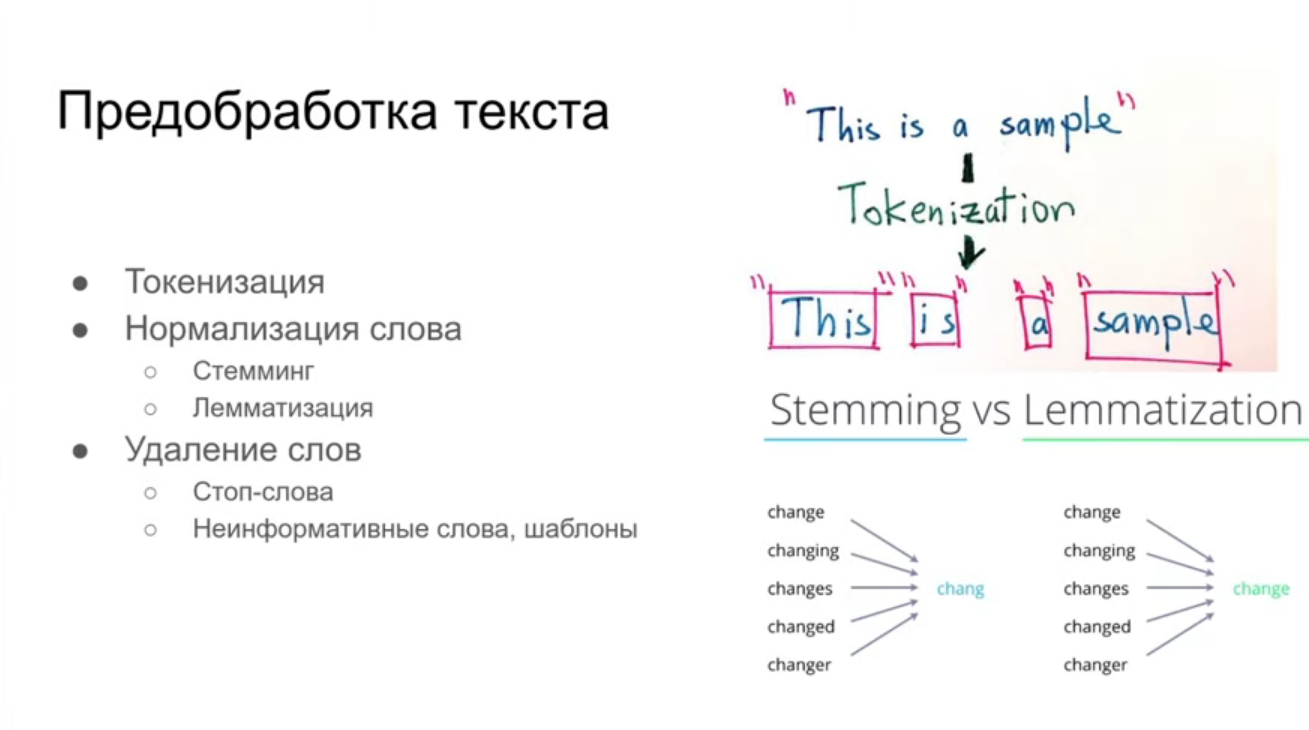

In [3]:
Image('images/preprocess.png', width=700)

## 1.1 Токенизация

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [48]:
# токенизация по словам
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

data = "К сожалению, В чат фиита нельзя кидать стикеры"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']
['к', 'сожалению', ',', 'в', 'чат', 'фиита', 'нельзя', 'кидать', 'стикеры']


In [50]:
# токенизация по предложениям
print(sent_tokenize("I was going home when she rung. It was a surprise."))
print(sent_tokenize("Решайте дз вовремя. Не откладывайте, не надейтесь на лучшее."))


['I was going home when she rung.', 'It was a surprise.']
['Решайте дз вовремя.', 'Не откладывайте, не надейтесь на лучшее.']


## 1.2 Нормализация слова
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

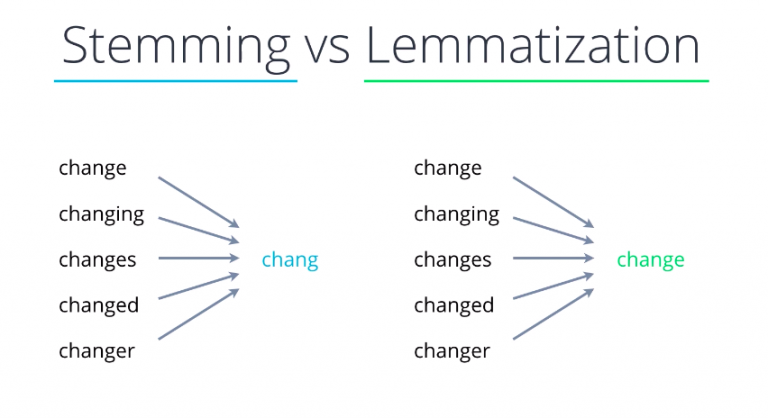

In [7]:
Image('images/lemmatization.png', width=500)

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [62]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/stihin/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [65]:
from nltk.stem import PorterStemmer, SnowballStemmer # Портер - самый первый алгоритм стемминга, Сноубол - прокаченная версия первого для нескольких языков

words = ["game", "gaming", "caring", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала', 'тиктокнуть']
words_de = ['ich', 'lieben', 'arbeiten']

In [52]:
from nltk.stem import SnowballStemmer

In [66]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'care', 'game', 'game', 'compact']

In [14]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа', 'тиктокнут']

In [15]:
ss = SnowballStemmer(language='german')
list(map(ss.stem, words_de))

['ich', 'lieb', 'arbeit']

* [Википедия](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BC%D0%BC%D0%B5%D1%80_%D0%9F%D0%BE%D1%80%D1%82%D0%B5%D1%80%D0%B0)
* [Как работает русский стеммер](http://snowball.tartarus.org/algorithms/russian/stemmer.html)

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [67]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП оно 
признано псевдонаукой. Систематические обзоры указывают что НЛП основано на 
устаревших представлениях об устройстве мозга, несовместимо с современной 
неврологией и содержит ряд фактических ошибок"""

#### NLTK

In [68]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(raw)
print(' '.join([wordnet_lemmatizer.lemmatize(token) for token in tokenization]))

DENNIS : Listen , strange woman lying in pond distributing sword is no basis for a system of government . Supreme executive power derives from a mandate from the mass , not from some farcical aquatic ceremony .


In [69]:
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
print(' '.join([wordnet_lemmatizer.lemmatize(token) for token in tokenization]))

study studying cry cry


In [70]:
text = "ничего вообще никак не работает с русским"
tokenization = nltk.word_tokenize(text, language='russian')
print(' '.join([wordnet_lemmatizer.lemmatize(token) for token in tokenization]))

ничего вообще никак не работает с русским


#### Pymorphy2

In [72]:
raw_ru = """Д'артаньян Не существует научных доказательств в пользу эффективности НЛП оно 
признано псевдонаукой. Систематические обзоры указывают что НЛП основано на 
устаревших представлениях об устройстве мозга, несовместимо с современной 
неврологией и содержит ряд фактических ошибок"""

In [73]:
import pymorphy2 #чисто для русского языка

morph = pymorphy2.MorphAnalyzer()

pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))

print(' '.join([res[0].normal_form for res in pymorphy_results]))

д'артаньян не существовать научный доказательство в польза эффективность нлп оно 
признать псевдонаукой. систематический обзор указывать что нлп основать на 
устаревший представление о устройство мозга, несовместимый с современный 
неврология и содержать ряд фактический ошибка


#### Есть еще spacy, это как nltk только круче и быстрее и для всех языков

In [44]:
import spacy #для всех языков
nlp = spacy.load("en_core_web_sm")
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

dennis : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


In [74]:
import spacy #для всех языков
nlp = spacy.load("ru_core_news_sm")
spacy_results = nlp(raw_ru)
print(' '.join([token.lemma_ for token in spacy_results]))

д'артаньян не существовать научный доказательство в польза эффективность нлп оно 
 признать псевдонаука . систематический обзор указывать что нлп основать на 
 устареть представление об устройство мозг , несовместимый с современный 
 неврология и содержать ряд фактический ошибка


### Морфологическая информация

[pymorphy морфология](https://pymorphy2.readthedocs.io/en/stable/user/guide.html#id3)

In [78]:
# в pymorphy
[(res[0].normal_form,  res[0].tag) for res in pymorphy_results[:9]]

[("д'артаньян", OpencorporaTag('NOUN,anim,masc,Name sing,nomn')),
 ('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп', OpencorporaTag('UNKN'))]

[spacy token](https://spacy.io/api/token)

In [79]:
# информация в spacy
[(token.lemma_, token.pos_, token.morph) for token in spacy_results[:7]]

[("д'артаньян", 'PROPN', Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing),
 ('не', 'PART', Polarity=Neg),
 ('существовать',
  'VERB',
  Aspect=Imp|Mood=Ind|Number=Sing|Person=Third|Tense=Pres|VerbForm=Fin|Voice=Act),
 ('научный', 'ADJ', Case=Gen|Degree=Pos|Number=Plur),
 ('доказательство', 'NOUN', Animacy=Inan|Case=Gen|Gender=Neut|Number=Plur),
 ('в', 'ADP', ),
 ('польза', 'NOUN', Animacy=Inan|Case=Acc|Gender=Fem|Number=Sing)]

### Named entities recognition (NER)

In [80]:
nlp = spacy.load("en_core_web_sm")

In [87]:
doc = nlp('Elon Musk buy Twitter')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [82]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [89]:
nlp = spacy.load("ru_core_news_sm")

doc = nlp('Герман Греф заявил, что Сбербанк в России потерял 100 миллионов $')

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Герман Греф 0 11 PER
Сбербанк 24 32 ORG
России 35 41 LOC


* [pymorpy2](https://pymorphy2.readthedocs.io/en/stable/)
* [spacy](https://habr.com/ru/post/504680/)

## 1.3 Удаление слов

### Стоп-слова

In [124]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stihin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'for', 'few', 'your', 'while', 'as', 'mustn', 'shouldn', 'theirs', 'has', "she's", 'into', 'again', 'its', 'you', 'that', 'on', 'yours', 'do', 'under', 'are', 'whom', 'until', 'our', "hadn't", "you've", 'there', 'now', 'd', 'more', 'or', 'were', 'm', 'then', "won't", 've', 'was', 'himself', 'these', 'each', 'off', 'will', 'am', 'ain', 'itself', "doesn't", "shouldn't", 'than', 'her', 'me', 'shan', 'this', 'be', 'why', 'in', 'we', 'where', 's', 'after', 'couldn', 'his', 'very', 'who', 'doesn', "couldn't", 'so', 'above', 're', 'those', "you'll", 'been', 'to', 'a', 'when', 'all', 'any', 'between', 'having', 'what', 'some', "that'll", 'it', 'don', "isn't", 'yourselves', 'same', 'and', "don't", "you're", 'if', 'not', 'below', 'being', 'out', 'aren', 'hasn', 'him', "it's", "you'd", 'should', 'through', 'they', 'over', "wouldn't", 'll', 'ourselves', 'did', 'down', 'my', 'by', 'further', 'weren', 'y', 'which', "needn't", 'he', 'o', "haven't", 'can', 'up', 'an', 'from', 'no', 'isn', 't', 'ma', 

In [59]:
stopWords = set(stopwords.words('russian'))
print(stopWords)

{'опять', 'вас', 'были', 'было', 'кто', 'моя', 'со', 'ему', 'без', 'но', 'если', 'был', 'так', 'больше', 'через', 'свою', 'нибудь', 'зачем', 'вот', 'перед', 'она', 'ни', 'тогда', 'да', 'чуть', 'почти', 'уж', 'тот', 'между', 'у', 'этой', 'или', 'к', 'над', 'более', 'даже', 'когда', 'ведь', 'мы', 'все', 'за', 'только', 'вам', 'есть', 'ты', 'будет', 'в', 'может', 'что', 'чего', 'того', 'себя', 'какой', 'здесь', 'теперь', 'не', 'как', 'же', 'их', 'какая', 'этого', 'ну', 'три', 'потом', 'меня', 'можно', 'с', 'то', 'наконец', 'чем', 'я', 'куда', 'хорошо', 'тебя', 'нас', 'хоть', 'про', 'там', 'после', 'них', 'впрочем', 'быть', 'во', 'его', 'много', 'всегда', 'нее', 'лучше', 'еще', 'мне', 'ли', 'под', 'для', 'он', 'всю', 'ей', 'уже', 'была', 'иногда', 'том', 'чтоб', 'будто', 'эту', 'бы', 'на', 'совсем', 'ничего', 'о', 'нет', 'всех', 'об', 'нельзя', 'ним', 'никогда', 'от', 'тоже', 'где', 'сейчас', 'конечно', 'два', 'до', 'ж', 'него', 'разве', 'этом', 'мой', 'ней', 'ее', 'такой', 'потому', 'этот

### Неинформативные слова, шаблоны
Найти слишком частые или супер редкие слова и удалить их. Удалить супер частые н-граммы.

In [18]:
Image('images/ngrams.gif', width=500)

In [90]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [91]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [93]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


---------------

# 2. Перевод текста в числовой вектор
Представление текстового объекта в виде числового вектора

## 2.1 Count Vectorizer

In [40]:
Image('images/bag_of_words.png', width=600)

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

X = [' my cat is on the table now', 
     'the dog is on the table are']

test = ['the dog the table', 
        'cat is on cat now hublot']

cv = CountVectorizer()
cv.fit(X)

pd.DataFrame(data=cv.transform(test).toarray(),
             columns=cv.get_feature_names())

are  cat  dog  is  my  now  on  table  the
0    0    0    1   0   0    0   0      1    2
1    0    2    0   1   0    1   1      0    0

Хорошо использовать в случае, когда достаточно сделать ембеддинг и дальше найти ближайший

## 2.2 TF-IDF

Будем называть один сэмпл со словами - **документом**. А одно слово в тексте **term**. 

Тогда вводятся 2 такие величины:

* $TF(t, d) = \frac{N_t}{N_d}$ - term frequency, частота встречаемости $t$ в документе $d$.
* $IDF(t) = \log{\frac{N}{count(d \in D| t \in d)}}$ - inverted document frequency, инвертированная частота документов, в которых содержится терм $t$

In [70]:
#A = “The car is driven on the road”
#B = “The truck is driven on the highway” 

Image('images/tfidf_example2.png', width=600)

#### В реальности все чуток по-другому)

In [72]:
Image('images/tf_idf_real.png', width=600)

In [100]:
np.log((1+2)/(1+1)) + 1

1.4054651081081644

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
      "the car is driven on the road",
      "the truck is driven on the highway"
]

cv = TfidfVectorizer(smooth_idf=True, norm=None)
vocab = cv.fit(corpus)

pd.DataFrame(data=vocab.transform(corpus).toarray(),
             columns=vocab.get_feature_names())

car  driven   highway   is   on      road  the     truck
0  1.405465     1.0  0.000000  1.0  1.0  1.405465  2.0  0.000000
1  0.000000     1.0  1.405465  1.0  1.0  0.000000  2.0  1.405465

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
      "the car is driven on the road",
      "the truck is driven on the highway"
]

cv = TfidfVectorizer(smooth_idf=True, norm='l2')
vocab = cv.fit(corpus)

pd.DataFrame(data=vocab.transform(corpus).toarray(),
             columns=vocab.get_feature_names())

car   driven   highway       is       on      road      the     truck
0  0.424717  0.30219  0.000000  0.30219  0.30219  0.424717  0.60438  0.000000
1  0.000000  0.30219  0.424717  0.30219  0.30219  0.000000  0.60438  0.424717

In [133]:
tfidf = np.array([1.405465, 1.0, 0.000000, 1.0, 1.0, 1.405465, 2.0, 0.000000])
tfidf / np.sqrt(sum(x*x for x in tfidf))

array([0.42471716, 0.30218978, 0.        , 0.30218978, 0.30218978,
       0.42471716, 0.60437957, 0.        ])

**Можно его посчитать и для н-грамм и поставить разные ограничения**

In [102]:
cv = TfidfVectorizer(min_df=0.3, ngram_range=(1, 2))
vocab = cv.fit(corpus)

pd.DataFrame(data=cv.transform(corpus).toarray(),
             columns=vocab.get_feature_names())

car    car is    driven  driven on   highway        is  is driven  \
0  0.315245  0.315245  0.224299   0.224299  0.000000  0.224299   0.224299   
1  0.000000  0.000000  0.224299   0.224299  0.315245  0.224299   0.224299   

         on    on the      road       the   the car  the highway  the road  \
0  0.224299  0.224299  0.315245  0.448599  0.315245     0.000000  0.315245   
1  0.224299  0.224299  0.000000  0.448599  0.000000     0.315245  0.000000   

   the truck     truck  truck is  
0   0.000000  0.000000  0.000000  
1   0.315245  0.315245  0.315245

## 2.3 Как это применять? Найдем похожие текста

Попробуем найти похожие аниме, по описанию

In [103]:
df = pd.read_csv('data/animes.csv')
df = df[['synopsis', 'title']]
df.dropna(inplace=True)
df = df[~df.title.duplicated(keep='first')]
df = df.reset_index(drop=True)
df

synopsis  \
0      Following their participation at the Inter-Hig...   
1      Music accompanies the path of the human metron...   
2      The Abyss—a gaping chasm stretching down into ...   
3      "In order for something to be obtained, someth...   
4      After helping revive the legendary vampire Kis...   
...                                                  ...   
15446  All-new animation offered throughout UNIQLO cl...   
15447  High school student Sora Kashiwagi is accustom...   
15448  After regaining her squid-like abilities, Ika ...   
15449  For years, the Niflheim Empire and the kingdom...   
15450  Although Yuuta Togashi and Rikka Takanashi hav...   

                                                   title  
0                                Haikyuu!! Second Season  
1                                Shigatsu wa Kimi no Uso  
2                                          Made in Abyss  
3                       Fullmetal Alchemist: Brotherhood  
4                       Kizumonogatari III: Reiketsu-hen  
...                                                  ...  
15446                                        Naruto x UT  
15447                                   Miira no Kaikata  
15448                             Shinryaku!? Ika Musume  
15449                      Kingsglaive: Final Fantasy XV  
15450  Chuunibyou demo Koi ga Shitai!: Kirameki no......  

[15451 rows x 2 columns]

In [126]:
import re, string
TITLE = 'Shingeki no Kyojin'
text = df[df['title'] == TITLE].synopsis.values[0]
stopWords = set(stopwords.words('english'))

def clean_up_text(text):
    doc = re.sub("[\(\[].*?[\)\]]", "", text) # Remove the "written by" caption
    doc = doc.replace(u'\n', u'').replace(u'\r', u'')
    doc = re.sub(r'[^\w\s]','',doc)
    doc = doc.lower()
    pool = doc.split()
    doc = ' '.join([x for x in pool if x not in stopWords])
    return doc

doc = clean_up_text(text)
print(doc)

centuries ago mankind slaughtered near extinction monstrous humanoid creatures called titans forcing humans hide fear behind enormous concentric walls makes giants truly terrifying taste human flesh born hunger appears pleasure ensure survival remnants humanity began living within defensive barriers resulting one hundred years without single titan encounter however fragile calm soon shattered colossal titan manages breach supposedly impregnable outer wall reigniting fight survival maneating abominations witnessing horrific personal loss hands invading creatures eren yeager dedicates life eradication enlisting survey corps elite military unit combats merciless humanoids outside protection walls based hajime isayamas awardwinning manga shingeki kyojin follows eren along adopted sister mikasa ackerman childhood friend armin arlert join brutal war titans race discover way defeating last walls breached


In [127]:
clear_anime = df['synopsis'].apply(clean_up_text)
clear_anime

0        following participation interhigh karasuno hig...
1        music accompanies path human metronome prodigi...
2        abyssa gaping chasm stretching depths earth fi...
3        order something obtained something equal value...
4        helping revive legendary vampire kissshot acer...
                               ...                        
15446    allnew animation offered throughout uniqlo clo...
15447    high school student sora kashiwagi accustomed ...
15448    regaining squidlike abilities ika musume plans...
15449    years niflheim empire kingdom lucis war empire...
15450    although yuuta togashi rikka takanashi started...
Name: synopsis, Length: 15451, dtype: object

In [135]:
cv = CountVectorizer(max_features=1000)
vocab = cv.fit(clear_anime)

anime_df = pd.DataFrame(data=cv.transform(clear_anime).toarray(),
             columns=vocab.get_feature_names(), index = df['title'])

In [136]:
anime_df

10  13  abandoned  \
title                                                                   
Haikyuu!! Second Season                              0   0          0   
Shigatsu wa Kimi no Uso                              0   0          0   
Made in Abyss                                        0   0          0   
Fullmetal Alchemist: Brotherhood                     0   0          0   
Kizumonogatari III: Reiketsu-hen                     0   0          0   
...                                                 ..  ..        ...   
Naruto x UT                                          0   0          0   
Miira no Kaikata                                     0   0          0   
Shinryaku!? Ika Musume                               0   0          0   
Kingsglaive: Final Fantasy XV                        0   0          0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...   0   0          0   

                                                    abilities  ability  able  \
title                                                                          
Haikyuu!! Second Season                                     0        0     0   
Shigatsu wa Kimi no Uso                                     0        0     0   
Made in Abyss                                               0        0     0   
Fullmetal Alchemist: Brotherhood                            0        0     1   
Kizumonogatari III: Reiketsu-hen                            0        0     0   
...                                                       ...      ...   ...   
Naruto x UT                                                 0        0     0   
Miira no Kaikata                                            0        0     0   
Shinryaku!? Ika Musume                                      1        0     0   
Kingsglaive: Final Fantasy XV                               0        0     0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...          0        0     0   

                                                    academy  accident  \
title                                                                   
Haikyuu!! Second Season                                   0         0   
Shigatsu wa Kimi no Uso                                   0         0   
Made in Abyss                                             0         0   
Fullmetal Alchemist: Brotherhood                          0         0   
Kizumonogatari III: Reiketsu-hen                          0         0   
...                                                     ...       ...   
Naruto x UT                                               0         0   
Miira no Kaikata                                          0         0   
Shinryaku!? Ika Musume                                    0         0   
Kingsglaive: Final Fantasy XV                             0         0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...        0         0   

                                                    accidentally  across  ...  \
title                                                                     ...   
Haikyuu!! Second Season                                        0       0  ...   
Shigatsu wa Kimi no Uso                                        0       0  ...   
Made in Abyss                                                  0       0  ...   
Fullmetal Alchemist: Brotherhood                               0       0  ...   
Kizumonogatari III: Reiketsu-hen                               0       0  ...   
...                                                          ...     ...  ...   
Naruto x UT                                                    0       0  ...   
Miira no Kaikata                                               0       0  ...   
Shinryaku!? Ika Musume                                         0       0  ...   
Kingsglaive: Final Fantasy XV                                  0       0  ...   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...             0       0  ...   

                                                    would

Для сравнения векторов можно использоваль 2 метода.

* Косинусное расстояние (схожесть)
$$dist(u, v) = \frac{\langle u,v \rangle}{\lVert u\rVert \lVert v \rVert}$$
$$sim(u, v) = 1 - \frac{\langle u,v \rangle}{\lVert u\rVert \lVert v \rVert}$$


* Корреляция Пирсона 
$$corr(u, v) = \frac{\langle u-\hat{u},v - \hat{v}\rangle}{\lVert u-\hat{u} \rVert \lVert v - \hat{v}\rVert}$$

**Косинусное расстояние** нужно использовать, если матрица составлена из количественных значений. Например кол-во купленных товаров разными юзерами.

**Корреляцию Пирсона** нужно использовать, когда матрица составлена из качественных субъективных оценок (например оценки фильмов разными пользователями). Так как оценки это субъективное понятие для каждого человека, нам нужно попытаться как-то нормировать оценку со средним значением: например один человек не ставит фильмам ниже оценки 7, а другой не выше оценки 7.

In [110]:
import scipy

In [130]:
1 - scipy.spatial.distance.cosine(anime_df.loc['Naruto'].values, 
                                  anime_df.loc['Fullmetal Alchemist: Brotherhood'].values)

0.03561222848978818

In [115]:
scipy.stats.pearsonr(anime_df.loc['Naruto'].values, 
                     anime_df.loc['Fullmetal Alchemist: Brotherhood'].values)[0]

0.5979484611001743

In [137]:
from sklearn.neighbors import NearestNeighbors

num_neighbours = 10
knn = NearestNeighbors(n_neighbors=num_neighbours, metric="cosine")
knn.fit(anime_df)


NearestNeighbors(metric='cosine', n_neighbors=10)

In [138]:
knn_result = knn.kneighbors(anime_df.loc['Naruto'].values[np.newaxis,:], n_neighbors=20)
knn_result

(array([[0.        , 0.59852247, 0.63726187, 0.66886691, 0.66886691,
         0.67219497, 0.68290399, 0.68505511, 0.68972729, 0.69343033,
         0.69397181, 0.69651151, 0.69651151, 0.70175955, 0.70259406,
         0.71563888, 0.71760875, 0.71785595, 0.71902426, 0.71902426]]),
 array([[  141,  3270, 11437,  6756,  2888,  6278,  9712,  2520,  2974,
         11712, 12442, 12734,   281,   749, 11312, 12690, 10786,   742,
          9069,  8293]]))

In [139]:
anime_df.loc['Naruto'][anime_df.loc['Naruto'] > 0]

also         1
attacked     1
become       1
deadly       1
demon        1
desire       1
end          1
find         1
fourth       1
friends      1
great        1
hidden       1
huge         1
inside       2
known        1
leader       1
leads        1
life         1
living       1
new          1
ninja        1
order        1
place        1
put          1
still        1
struggles    1
village      3
Name: Naruto, dtype: int64

In [140]:
anime_df.index.values[knn_result[1]]

array([['Naruto', 'Mayoiga', 'Paniponi',
        'Naruto: Takigakure no Shitou - Ore ga Eiyuu Dattebayo!',
        'Doubutsu no Mori', 'Kappa Kawatarou', 'Kappamaki',
        'Balthus: Tia no Kagayaki', 'Mahoujin Guruguru',
        'Sylvanian Families: Mini Story',
        'Heisei Inu Monogatari Bow Movie',
        'Boruto: Naruto Next Generations', 'Higurashi no Naku Koro ni',
        'Mononoke Hime', 'Mina no Mura to Kawa', 'Ookamikakushi',
        'Kishin Douji Zenki Gaiden: Anki Kitan',
        'Mushishi Zoku Shou 2nd Season', 'Doubutsu Mura no Kodomo-tachi',
        'Tekusuke Monogatari']], dtype=object)

### 2.4 Проблемы

Матрица, которую мы используем, крайне большая, но крайне бессмысленная: большая часть значений в нуле.

In [141]:
anime_df.index

10  13  abandoned  \
title                                                                   
Haikyuu!! Second Season                              0   0          0   
Shigatsu wa Kimi no Uso                              0   0          0   
Made in Abyss                                        0   0          0   
Fullmetal Alchemist: Brotherhood                     0   0          0   
Kizumonogatari III: Reiketsu-hen                     0   0          0   
...                                                 ..  ..        ...   
Naruto x UT                                          0   0          0   
Miira no Kaikata                                     0   0          0   
Shinryaku!? Ika Musume                               0   0          0   
Kingsglaive: Final Fantasy XV                        0   0          0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...   0   0          0   

                                                    abilities  ability  able  \
title                                                                          
Haikyuu!! Second Season                                     0        0     0   
Shigatsu wa Kimi no Uso                                     0        0     0   
Made in Abyss                                               0        0     0   
Fullmetal Alchemist: Brotherhood                            0        0     1   
Kizumonogatari III: Reiketsu-hen                            0        0     0   
...                                                       ...      ...   ...   
Naruto x UT                                                 0        0     0   
Miira no Kaikata                                            0        0     0   
Shinryaku!? Ika Musume                                      1        0     0   
Kingsglaive: Final Fantasy XV                               0        0     0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...          0        0     0   

                                                    academy  accident  \
title                                                                   
Haikyuu!! Second Season                                   0         0   
Shigatsu wa Kimi no Uso                                   0         0   
Made in Abyss                                             0         0   
Fullmetal Alchemist: Brotherhood                          0         0   
Kizumonogatari III: Reiketsu-hen                          0         0   
...                                                     ...       ...   
Naruto x UT                                               0         0   
Miira no Kaikata                                          0         0   
Shinryaku!? Ika Musume                                    0         0   
Kingsglaive: Final Fantasy XV                             0         0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...        0         0   

                                                    accidentally  across  ...  \
title                                                                     ...   
Haikyuu!! Second Season                                        0       0  ...   
Shigatsu wa Kimi no Uso                                        0       0  ...   
Made in Abyss                                                  0       0  ...   
Fullmetal Alchemist: Brotherhood                               0       0  ...   
Kizumonogatari III: Reiketsu-hen                               0       0  ...   
...                                                          ...     ...  ...   
Naruto x UT                                                    0       0  ...   
Miira no Kaikata                                               0       0  ...   
Shinryaku!? Ika Musume                                         0       0  ...   
Kingsglaive: Final Fantasy XV                                  0       0  ...   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...             0       0  ...   

                                                    would

In [200]:
anime_df.astype(np.bool).astype(int).values.sum()

637987

К тому же осмысленных значений в ней очень мало

In [142]:
637987 / (15451 * 1000)

0.04129098440230406

In [143]:
anime_df.memory_usage()

Index        652032
10           123608
13           123608
abandoned    123608
abilities    123608
              ...  
youkai       123608
young        123608
younger      123608
youtube      123608
yuki         123608
Length: 1001, dtype: int64

Можно воспользоваться разряженными матрицами

In [146]:
anime_df.index

Index(['Haikyuu!! Second Season', 'Shigatsu wa Kimi no Uso', 'Made in Abyss',
       'Fullmetal Alchemist: Brotherhood', 'Kizumonogatari III: Reiketsu-hen',
       'Mob Psycho 100 II', 'Sen to Chihiro no Kamikakushi',
       'Kimetsu no Yaiba', 'Owarimonogatari 2nd Season',
       'Code Geass: Hangyaku no Lelouch R2',
       ...
       'Yowamushi Pedal: Re:RIDE',
       'Pokemon Movie 02: Maboroshi no Pokemon Lugia Bakutan',
       'Mekakucity V's', 'Amagami SS', 'Net-juu no Susume Special',
       'Naruto x UT', 'Miira no Kaikata', 'Shinryaku!? Ika Musume',
       'Kingsglaive: Final Fantasy XV',
       'Chuunibyou demo Koi ga Shitai!: Kirameki no... Slapstick Noel'],
      dtype='object', name='title', length=15451)

In [144]:
from scipy import sparse

sparse_anime = sparse.csr_matrix(anime_df)

anime_df.index

In [ ]:
sparse_anime.co

In [145]:
print(sparse_anime[:100,:100])

  (0, 31)	1
  (0, 33)	1
  (0, 66)	1
  (0, 67)	1
  (0, 68)	1
  (1, 21)	1
  (1, 31)	1
  (1, 78)	1
  (1, 82)	1
  (1, 91)	1
  (2, 52)	1
  (2, 84)	1
  (2, 94)	1
  (3, 5)	1
  (3, 10)	1
  (3, 29)	1
  (3, 72)	1
  (3, 84)	1
  (4, 28)	1
  (4, 74)	2
  (4, 84)	1
  (5, 16)	1
  (5, 57)	1
  (6, 2)	1
  (6, 30)	1
  :	:
  (92, 17)	1
  (94, 9)	1
  (94, 74)	1
  (94, 84)	1
  (94, 90)	1
  (95, 83)	1
  (96, 30)	1
  (96, 35)	1
  (96, 57)	1
  (97, 10)	1
  (97, 19)	1
  (97, 23)	1
  (97, 47)	1
  (97, 80)	1
  (97, 86)	1
  (97, 89)	1
  (97, 91)	1
  (98, 0)	2
  (98, 5)	1
  (98, 31)	1
  (98, 90)	1
  (99, 16)	3
  (99, 33)	1
  (99, 58)	1
  (99, 84)	1


В таких случаях прибегают к матричным разложениям. 

---------

## 2.5 Матричные разложения SVD, ALS

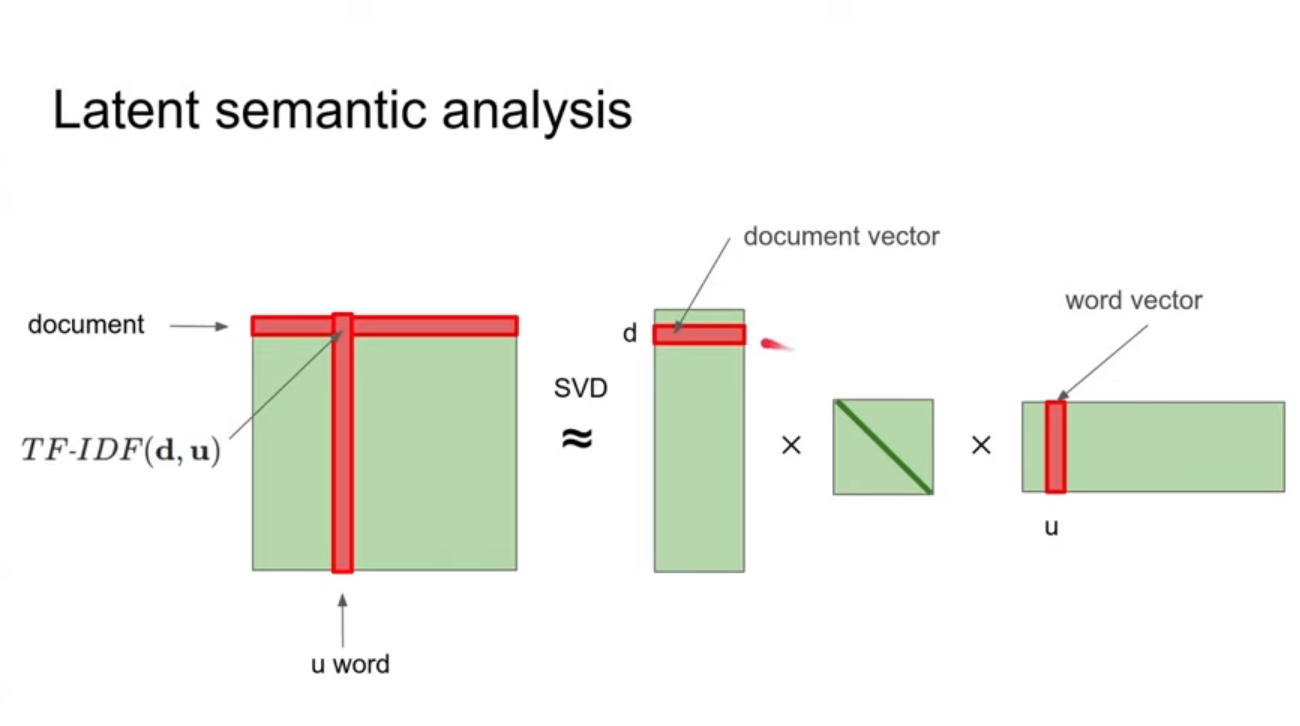

In [21]:
Image('images/tfidfsvd.png', width=600)

In [147]:
%%time
u, s, vh = np.linalg.svd(anime_df.values[:1000,:1000], full_matrices=False)

CPU times: user 3.17 s, sys: 1.14 s, total: 4.31 s
Wall time: 1.14 s


In [152]:
u.shape, s.shape , vh.shape

((1000, 1000), (1000,), (1000, 1000))

In [153]:
U = np.round(u,3)[:,:3]
S = np.eye(3) * s[:3]
VT = np.round(vh, 3)[:3,:]

In [154]:
U

array([[-0.043, -0.047,  0.063],
       [-0.034,  0.02 , -0.013],
       [-0.041,  0.034, -0.003],
       ...,
       [-0.012, -0.   ,  0.001],
       [-0.015,  0.007, -0.015],
       [-0.013,  0.005,  0.017]])

In [155]:
np.round(U.dot(S).dot(VT), 1)

array([[ 0.,  0.,  0., ...,  0.,  0., -0.],
       [ 0.,  0.,  0., ...,  0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0., -0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -0.]])

Заметим, что у схожих векторов и после сокращения размерностей вектора похожи.

In [23]:
from scipy.spatial.distance import cosine

## ALS (Alternated Least Squares)

Рассмотрим еще один способ разложения матрицы. В отличие от SVD, основанный на Машинном обучения.

Пусть есть наша исходная очень большая матрица $R$

Мы хотим найти такие матрицы $U$ и $P$ c фиксированной шириной $k$, что $R \approx U \times P^{T}$.

Давайте попробуем составить задачу оптимизации.

In [63]:
Image('images/als.png', width=600)

Мы составили некоторый функционал. Теперь будем его оптимизировать по следующему алгоритму.

* Инициализировали начальные состояния (например все 1)
* Зафиксировали одну из матриц. 
* Посчитали новые значения для второй матрицы (выразили решение, через ошибку)
   - или $u_i = (P^T \times P + \lambda I_k)^{-1}\times P^{T}\times r_i$ (по строкам берем $r_i$)
   - или $p_j = (U^T \times U + \lambda I_k)^{-1}\times U^{T}\times r_j$ (по столбцам берем $r_j$)
   - Здесь $U$ размера $m \times k$, $P$ размера $n \times k$, $I_k$ - единичная матрица размера $k$
   - По сути в $U$ будут лежать сжатые векторы для юзеров, а в $P$ для товаров
   - Формула ничего не напоминает?:)
* Теперь зафиксировали другую матрицу и меняем веса у первой.
* Повторяем операцию, пока не минимизируется ошибка

**Сноска для мат-душнил**

Резонный вопрос о том почему это все сходится к какому-то хотя бы локальному решению? Это фактически метод итераций и в случае если функция хорошая (выпуклая) все сходится, однако с матрицами все сложнее. Есть пара доказательсв того, что если матрицы положительно-определенные, то все в целом должно быть норм.

Для глубоко изучения можете начать отсюда: [Non-negative matrix factorization](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)

#### Ключевой плюс ALS разложения: быстрый пересчет для новых значений.
Допустим мы добавили в выборку нового юзера или новый товар. Что нам для него нужно сделать?

Всего лишь использовать **один** раз формулу выше, так как $P$ уже соптимизированна! Просто все пересчитать для новой пары векторов $(w_i, r_i)$

Также благодаря тому, что каждый вектор пересчитывается независимо от других, это позволяет нам распаралелить вычисление каждого нового векторы, что делает ALS невероятно быстрым даже на большом объеме данных.

Тут нам вновь пригодится новая библиотека

In [156]:
from implicit import als

In [157]:
model = als.AlternatingLeastSquares(factors=30, regularization=0.1, iterations=20)
data_conf = (sparse_anime).astype('double')
model.fit(data_conf)

  0%|          | 0/20 [00:00<?, ?it/s]

In [158]:
anime_df - model.user_factors.shape * model.item_factors.shape

((15451, 30), (1000, 30))

In [163]:
user_id =   12
recommended = model.recommend(user_id, sparse_anime[user_id], filter_already_liked_items=False)
print(recommended)

(array([892, 361, 993, 591, 125, 368, 400,  33,  74, 640], dtype=int32), array([0.9388419 , 0.8034953 , 0.76238155, 0.670845  , 0.439835  ,
       0.36763328, 0.3288275 , 0.3194076 , 0.3154177 , 0.3044414 ],
      dtype=float32))


In [162]:
anime_df.index[12]

'Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare'

In [164]:
anime_df.index.values[recommended[0]]

array(['K: Missing Kings', 'Eve no Jikan (Movie)', 'Turn A Gundam',
       'Violet Evergarden: Kitto "Ai" wo Shiru Hi ga Kuru no Darou',
       'Seitokai Yakuindomo Movie', 'Full Metal Panic? Fumoffu', 'K-On!!',
       'Doukyonin wa Hiza, Tokidoki, Atama no Ue.', 'Space☆Dandy',
       'Mahou Shoujo Madoka★Magica'], dtype=object)

# 2.6 FAISS
[Вики faiss](https://github.com/facebookresearch/faiss/wiki)

In [44]:
import faiss

In [46]:
anime_df

009  10  100  1000  100th  \
title                                                                           
Haikyuu!! Second Season                               0   0    0     0      0   
Shigatsu wa Kimi no Uso                               0   0    0     0      0   
Made in Abyss                                         0   0    0     0      0   
Fullmetal Alchemist: Brotherhood                      0   0    0     0      0   
Kizumonogatari III: Reiketsu-hen                      0   0    0     0      0   
...                                                 ...  ..  ...   ...    ...   
Naruto x UT                                           0   0    0     0      0   
Miira no Kaikata                                      0   0    0     0      0   
Shinryaku!? Ika Musume                                0   0    0     0      0   
Kingsglaive: Final Fantasy XV                         0   0    0     0      0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...    0   0    0     0      0   

                                                    101  10th  10yearold  11  \
title                                                                          
Haikyuu!! Second Season                               0     0          0   0   
Shigatsu wa Kimi no Uso                               0     0          0   0   
Made in Abyss                                         0     0          0   0   
Fullmetal Alchemist: Brotherhood                      0     0          0   0   
Kizumonogatari III: Reiketsu-hen                      0     0          0   0   
...                                                 ...   ...        ...  ..   
Naruto x UT                                           0     0          0   0   
Miira no Kaikata                                      0     0          0   0   
Shinryaku!? Ika Musume                                0     0          0   0   
Kingsglaive: Final Fantasy XV                         0     0          0   0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...    0     0          0   0   

                                                    11th  ...  zoid  zoids  \
title                                                     ...                
Haikyuu!! Second Season                                0  ...     0      0   
Shigatsu wa Kimi no Uso                                0  ...     0      0   
Made in Abyss                                          0  ...     0      0   
Fullmetal Alchemist: Brotherhood                       0  ...     0      0   
Kizumonogatari III: Reiketsu-hen                       0  ...     0      0   
...                                                  ...  ...   ...    ...   
Naruto x UT                                            0  ...     0      0   
Miira no Kaikata                                       0  ...     0      0   
Shinryaku!? Ika Musume                                 0  ...     0      0   
Kingsglaive: Final Fantasy XV                          0  ...     0      0   
Chuunibyou demo Koi ga Shitai!: Kirameki no... ...     0  ...     0      0   

                                                    zoku  zombie  zombies  \
title                                                                       
Haikyuu!! Second Season                                0       0        0   
Shigatsu wa Kimi no Uso                                0       0        0   
Made in Abyss                                          0       0        0   
Fullmetal Alchemist: Brotherhood                       0       0        0   
Kizumonogatari III: Reiketsu-hen                       0       0        0   
...                                                  ...     ...      ...   
Naruto x UT                                            0       0        0   
Miira no Kaikata                                       0       0        0   
Shinryaku!? Ika Musume                                 0       0        0   
Kingsglaive: Final Fantasy XV                          0       0        0   
Chuunibyou demo Ko

In [45]:
index = faiss.index_factory(128, "IVF256,PQ32", faiss.METRIC_INNER_PRODUCT)
index.train(sparse_anime)

AssertionError: 

In [ ]:
distances, neighbors = index.search(xq.reshape(1,-1).astype(np.float32), k)

[Индексы в faiss](https://github.com/facebookresearch/faiss/wiki/Faiss-indexes)